In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

np.random.seed(42)

In [4]:
#중심점이 4개인 150개의 점 데이터를 무작위 생성
# make_blobs
points, labels = make_blobs(n_samples=150, centers = 4, n_features=2,
                           random_state = 42)

#무작위로 생성된 점의 좌표 10개 출력
print(points.shape, "\n", points[:10])
print(labels.shape, "\n", labels[:10])

(150, 2) 
 [[-2.54502366 10.57892978]
 [-3.34841515  8.70507375]
 [-8.55733589  6.7008234 ]
 [ 6.52606474  2.1477475 ]
 [-6.36459192 -6.36632364]
 [-6.25395984 -7.73726715]
 [-3.18611962  9.62596242]
 [-2.97867201  9.55684617]
 [-7.35155906 -5.791159  ]
 [-7.72642091 -8.39495682]]
(150,) 
 [0 0 3 1 2 2 0 0 2 2]


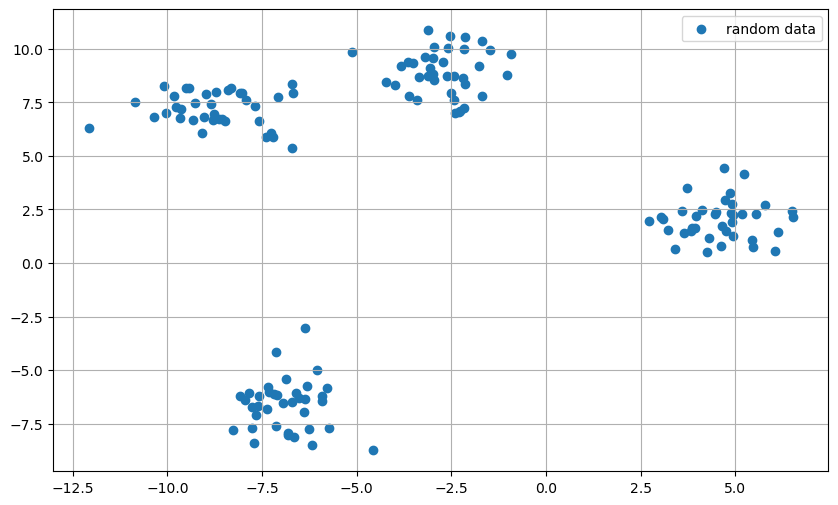

In [7]:
figure = plt.figure(figsize = (10, 6))
axes = figure.add_subplot(111)

points_df = pd.DataFrame(points, columns=['X', 'Y'])
points_df

axes.scatter(points_df['X'], points_df['Y'], label = 'random data')
axes.grid()
axes.legend()
plt.show()

In [9]:
from sklearn.cluster import KMeans

k_cluster = KMeans(n_clusters = 4)
k_cluster

KMeans(n_clusters=4)

In [13]:
k_cluster.fit(points)

print(k_cluster.labels_)
print(type(k_cluster.labels_))
print(np.shape(k_cluster.labels_))
print(np.unique(k_cluster.labels_))

[0 0 3 2 1 1 0 0 1 1 3 3 2 3 1 2 3 2 2 2 0 3 1 3 1 3 3 0 3 2 2 0 1 3 2 2 1
 3 1 0 2 3 0 0 1 2 0 1 0 3 2 2 2 0 0 3 2 1 3 0 3 3 1 1 1 2 1 1 2 2 3 0 2 0
 0 2 2 1 2 0 0 3 0 1 2 0 2 1 3 2 3 2 0 3 1 2 3 3 0 2 1 1 0 0 1 0 3 2 2 3 1
 2 2 3 3 2 3 1 3 0 3 3 2 3 0 1 3 1 2 3 0 0 2 1 0 1 1 1 2 3 0 0 1 1 0 0 1 0
 0 1]
<class 'numpy.ndarray'>
(150,)
[0 1 2 3]


C:\Users\KOREA_IT\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KOREA_IT\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


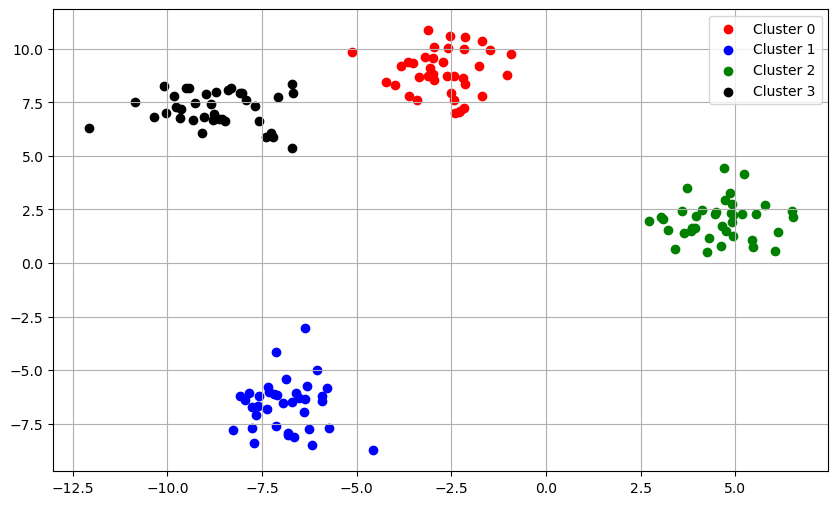

In [16]:
color_di = {0:'red', 1:'blue', 2:'green', 3:'black'}

plt.figure(figsize = (10, 6))

for cluster in range(4):
    cluster_sub = points[k_cluster.labels_ == cluster]
    plt.scatter(cluster_sub[:, 0], cluster_sub[:, 1], c = color_di[cluster],
                label=f"Cluster {cluster}")

plt.grid(True)
plt.legend()
plt.show()

C:\Users\KOREA_IT\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KOREA_IT\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


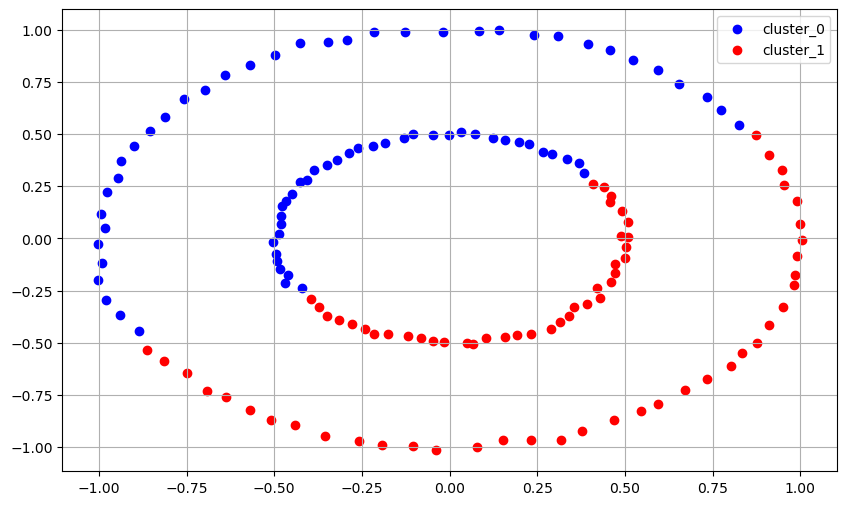

In [21]:
from sklearn.datasets import make_circles

circle_points, circle_labels = make_circles(n_samples = 150, factor = 0.5, 
                                           noise = 0.01)
#n_samples : 생성할 데이터 샘플의 총 개수
#factor : 원 안의 원과 원 바깥의 원의 크기 비율, 값이 작을 수록 안쪽원이 작아짐
#        값이 커질수록 안쪽 원이 커진다
#noise : 값이 0에 가까울수록 노이즈 적고 값이 높을수록 노이즈가 많음

plt.figure(figsize=(10, 6))

#모델생성
circle_kmeans = KMeans(n_clusters = 2)
circle_kmeans

#모델 학습
circle_kmeans.fit(circle_points)

color_di = {0:"blue", 1:'red'}
for i in range(2):
    cluster_sub = circle_points[circle_kmeans.labels_ == i]
    plt.scatter(cluster_sub[:, 0], cluster_sub[:, 1],
               c = color_di[i], label = f"cluster_{i}")
    
plt.legend()
plt.grid(True)
plt.show()

C:\Users\KOREA_IT\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KOREA_IT\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


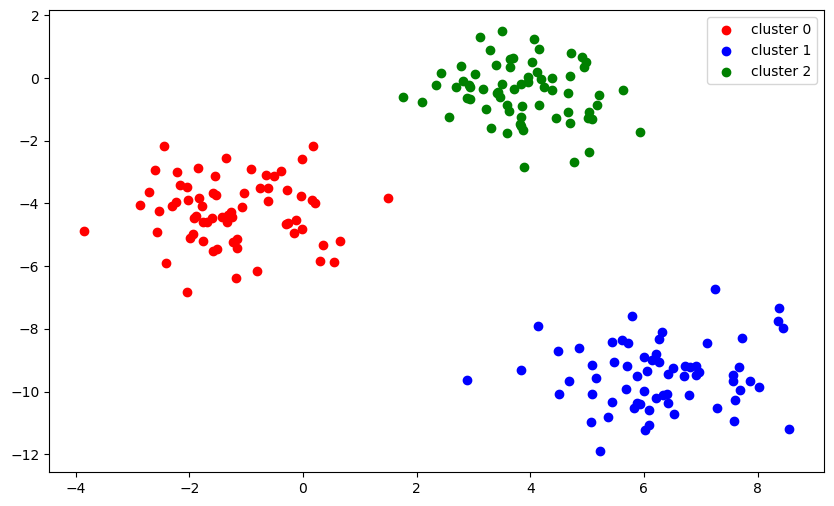

In [33]:
from sklearn.datasets import make_circles, make_moons, make_blobs

X, y = make_blobs(n_samples = 200, random_state = 163)
# print(X)
# print(y)
transformation =[[0.6, -0.6], [-0.3, 0.8]]

diag_points = np.dot(X, transformation)
#.dot() : 배열과 행렬사이의 행렬곱셈을 수행할 수 있고 X배열의 모든 데이터 포인트에
#대한 선형변환을 적용시킬 수 있다

# print(diag_points)
figure = plt.figure(figsize = (10, 6))
axes = figure.add_subplot(111)

diag_kmeans = KMeans(n_clusters = 3)
diag_kmeans.fit(X)

color_di = {0:"red", 1:"blue", 2:"green"}

for cluster in range(3):
    cluster_sub = X[diag_kmeans.labels_ == cluster]
    axes.scatter(cluster_sub[:, 0], cluster_sub[:, 1], c = color_di[cluster],
                label = f"cluster {cluster}")
    
plt.legend()
plt.show()

5
[ 0  1  1  1  2  0  0  2  0  0  0  1  2  1  2  0  0  2  0  2  3  2  0  0
  3  2  1  2  1  1  1 -1  0  1  1  1  0  0  1  2  2  2  1  0  2  0  1  0
  1  2  0  2  0  1  2  2  0  2  2  1 -1  2  2  0  2  1  2  1  0  0  3  1
  2  1  0  1  2  0  1  2  2  1  1  1  0  1 -1  1 -1  1  1  2  2  1  2  0
  1  0  2  1  1  1  4 -1  1  0  1  0  2  1  2  1  2 -1  1  2  0  2  2  1
  0  4  1  0  2  0  0  0  1  2  0  2  1  2  2  0  3  0  2  2  3  0  2  0
  2  1  0  0  1  0  0  2  0  2  0  0  2  0  2  0  0  2  2  0  1  1  0  0
  2  1  1  0  0 -1  0  0 -1  1  3  1  1  1  1  2  1  0  0  2  2  1  0  2
  1  3  1  4  1  0  0  2]


KeyError: 4

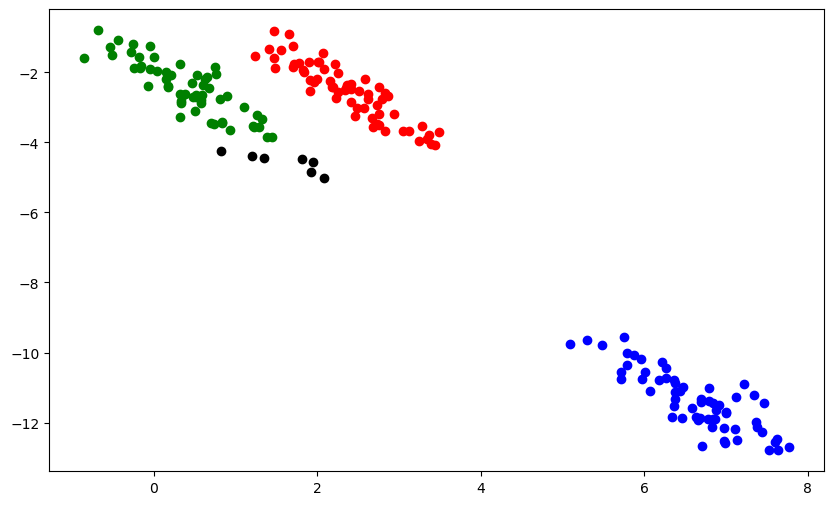

In [48]:
from sklearn.cluster import DBSCAN

figure = plt.figure(figsize = (10, 6))
axes = figure.add_subplot(111)

color_di = {0:"red", 1:"blue", 2:"green", 3:"black"}

epsilon = 0.5
minPts = 3

diag_dbscan = DBSCAN(eps = epsilon, min_samples = minPts)
#DBSCAN : 밀도 기반 클러스터링 알고리즘
#eps : 클러스터의 반경을 나타낸다 minPts의 이상의 이웃 포인트가 있으면 해당
#      포인트를 중심점으로 간주(클러스터의 크기 조절)
#min_samples : 클러스터를 구성하기 위한 최소 이웃 포인트의 개수,
#      주어진 데이터 포인트 내에서 minPts이상의 이웃 포인트가 있을 때만 클러스터를 형성
#metric : 거리 측정 방법을 지정하는 매개변수, 기본적으로 유클리드 거리
#algorithm : 클러스터링 알고리즘을 선택하는 매개변수, 기본값은 auto

diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_) + 1
print(n_cluster) #군집의 수, DBSCAN 알고리즘의 군집번호는 음수값을 포함하므로
#군집번호 최대값에 + 1
print(diag_dbscan.labels_) #각 데이터 포인트의 군집번호
# -1로 출력된 것은 noise point : 클러스터의 중심점을 찾고, 중심점으로 부터 일정
# 반경내에 충분한 이웃포인터가 없는 포인트(어떤 클러스터에도 속하지 않는것을 의미)

for i in range(n_cluster):
    cluster_sub = diag_points[diag_dbscan.labels_ == i]
    plt.scatter(cluster_sub[:, 0], cluster_sub[:, 1], c = color_di[i])

axes.grid(True)
plt.show()